# Prova 2 - C210-L4

### Instruções
* Esta prova deve ser feita INDIVIDUALMENTE, sem acesso a outros alunos
* Use apenas o Resumo com o conteúdo da matéria como na prova passada
* Para a realização da prova apenas altere este notebook
* Ao final, envie na tarefa criada no Teams apenas o notebook com as alterações. **Renomeie o arquivo com sua matrícula (exemplo 1736.ipynb) antes de enviar**.
* **As saídas das células e seu conteúdo serão utilizadas para a correção, portanto não limpe as saídas e não apague as células, senão não será possível corrigir sua prova**
* Preencha o campo a seguir com suas informações

#### Boa prova!!!

##### Nome: Isaque Hollanda Gonçalves
##### Curso: GES
##### Matrícula: 166

#### Bibliotecas Necessárias

In [1]:
%pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control
import matplotlib.pyplot as plt
import math

Note: you may need to restart the kernel to use updated packages.


#### Questão 1 (30 Pontos)

**Obs:** Apenas no caso dessa questão de Fuzzy, por causa do problema relacionado a Scikit-Fuzzy que não funciona na versão 3.10 em diante do python, vou ignorar a execução do código.

Para fazer a programação de um refrigerador Eletrônico, um engenheiro decidiu usar um sistema Fuzzy do tipo MISO. O sistema leva em consideração como antecedente a temperatura atual e o tempo médio em que os alimentos foram colocados na geladeira (em minutos). Após passar pelo processo de Defuzzificação, o sistema deve retornar o valor da potência do refrigerador.

    Temperatura: Temp = ["BAIXA", "MEDIA", "ALTA"]
    Tempo Médio: TM = ["CURTO", "MEDIO", "LONGO"]
    Potencia: POT = ["BAIXA", "MEDIA", "ALTA"]

Baseando-se nisso aplique o seguinte conjunto de regras para o funcionamento do Sistema Fuzzy:

    
    Se Temp == BAIXA e TM == CURTO, então POT == MEDIA
    Se Temp == MEDIA e TM == CURTO, então POT == ALTA
    Se Temp == ALTA, então POT == ALTA
    Se Temp == MEDIA e TM == LONGO, então POT == MEDIA
    Se Temp == BAIXA e TM == MEDIO, então POT == MEDIA
    Se Temp == BAIXA e TM == LONGO, então POT == BAIXA

**Dica:** Chame a seguinte função para aplicar as regras $regra = control.Rule(Parâmetros)$

Resultado 'desfuzzificado': 226.14772727272728


/opt/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


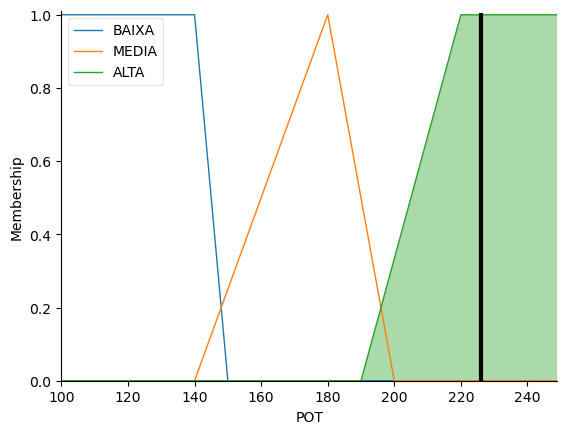

In [2]:
# Definindo universo de discurso e nome da variável
universoTemperatura = np.arange(-5, 20)
universoTempo = np.arange(0, 30)
universoPotencia = np.arange(100, 250)

temperatura = control.Antecedent(universe = universoTemperatura, label = "Temp")
tempoMedio = control.Antecedent(universe = universoTempo, label = "TM")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
temperatura["BAIXA"] = fuzzy.trapmf(temperatura.universe, [-5, -5, 2, 4])
temperatura["MEDIA"] = fuzzy.trimf(temperatura.universe, [3, 10, 15])
temperatura["ALTA"] = fuzzy.trapmf(temperatura.universe, [14, 16, 20, 20])

tempoMedio["CURTO"] = fuzzy.trapmf(tempoMedio.universe, [0, 0, 10, 14])
tempoMedio["MEDIO"] = fuzzy.trimf(tempoMedio.universe, [12, 18, 24])
tempoMedio["LONGO"] = fuzzy.trapmf(tempoMedio.universe, [20, 26, 30, 30])

potencia = control.Consequent(universe = universoPotencia, label = "POT")

potencia["BAIXA"] = fuzzy.trapmf(potencia.universe, [100, 100, 140, 150])
potencia["MEDIA"] = fuzzy.trimf(potencia.universe, [140, 180, 200])
potencia["ALTA"] = fuzzy.trapmf(potencia.universe, [190, 220, 250, 250])


# COLOQUE AS REGRAS AQUI
regra1 = control.Rule(temperatura['BAIXA'] & tempoMedio['CURTO'], potencia['MEDIA'])
regra2 = control.Rule(temperatura['MEDIA'] & tempoMedio['CURTO'], potencia['ALTA'])
regra3 = control.Rule(temperatura['ALTA'], potencia['ALTA'])
regra4 = control.Rule(temperatura['MEDIA'] & tempoMedio['LONGO'], potencia['MEDIA'])
regra5 = control.Rule(temperatura['BAIXA'] & tempoMedio['MEDIO'], potencia['MEDIA'])
regra6 = control.Rule(temperatura['BAIXA'] & tempoMedio['LONGO'], potencia['BAIXA'])


# Adicionando regras ao controle
controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(controle)

sistema.input["Temp"] = 20
sistema.input["TM"] = 10 

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['POT']}")

potencia.view(sim = sistema)

#### Questão 2 (35 pontos)

Dado os pontos fornecidos no gráfico de dispersão abaixo, faça o que se pede:

**a) (10 pontos)** Crie duas redes neurais (1 Perceptron e 1 Adaline), defina os parâmetros delas como preferir, seguindo o quadro de restrições abaixo.

|Hiperparâmetro|Restrição|
|-|-|
|Taxa de aprendizado|Entre 0.005 e 0.1|
|Tolerância|Entre $10^{-7}$ e $10^{-5}$|
|Máximo de épocas|Entre 1000 e 10000|

Exemplo de criação de rede
```python
rede1 = MODELO_DA_REDE(parâmetros da rede)
rede2 = MODELO_DA_REDE(parâmetros da rede)
rede1.TREINO(Amostra de Treino)
rede1.TESTE(Amostra de Teste)
```

**b) (10 pontos)** Treine as duas redes com os dados fornecidos anteriormente (x e d). 

**c) (10 pontos)** Teste as duas redes enviando x_teste. Apresente o resultado do teste e verifique se o resultado de ambas é igual aos valores de d_teste

**d) (5 pontos)** Qual das redes obteve mais resultados iguais aos esperados?

**Resposta D:**
Ambas redes obtiveram os resultados corretos.


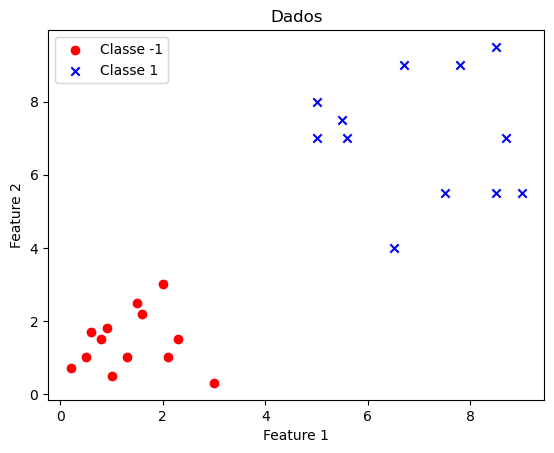

In [3]:
x = np.array(([[0.5, 1.0], [1.5, 2.5], [1.0, 0.5], [2.0, 3.0], [0.2, 0.7],
              [0.8, 1.5], [1.6, 2.2], [0.6, 1.7], [3.0, 0.3], [2.1, 1.0],
              [0.9, 1.8], [2.3, 1.5], [1.3, 1.0], [5.0, 7.0], [6.5, 4.0],
              [5.0, 8.0], [7.5, 5.5], [8.5, 9.5], [5.5, 7.5], [8.5, 5.5],
              [7.8, 9.0], [6.7, 9.0], [8.7, 7.0], [9.0, 5.5], [5.6, 7.0]
             ]))

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualizando os dados
plt.scatter(x[d == -1, 0], x[d == -1, 1], color='red', marker='o', label='Classe -1')
plt.scatter(x[d == 1, 0], x[d == 1, 1], color='blue', marker='x', label='Classe 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dados')
plt.show()

x_teste = np.array([[0.4, 0.9], [1.6, 2.4], [1.1, 0.4], [2.2, 3.1], [0.3, 0.8],
                    [0.9, 1.4], [1.5, 2.1], [0.5, 1.5], [3.1, 0.4], [2.0, 1.2],
                    [0.7, 2.0], [2.2, 1.7], [1.0, 1.1], [5.1, 7.1], [6.4, 4.4],
                    [5.1, 8.0], [7.7, 5.7], [8.6, 9.3], [5.4, 7.7], [8.7, 5.8],
                    [7.6, 8.9], [6.9, 9.3], [8.9, 6.7], [9.1, 5.7], [5.8, 7.4]
                   ])

d_teste = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


#### Adaline (Não precisa modificar esse código)

In [4]:
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
    def activation(self, value):
        ''' 1 se value > 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

#### Perceptron (Não precisa modificar esse código)

In [5]:
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        '''Construtor, define taxa de aprendizado e número máximo de épocas'''
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        ''' 1 se value > 0, -1 se value < 0, 0 se value == 0 '''
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto houver erro, ou o máximo de épocas não for atingido continua o processo
            
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

#### Faça a questão aqui:

In [17]:
# Questão A
rede_p = Perceptron(lr=0.05, n_epochs=5000)
rede_a = Adaline(lr=0.01, e=1e-6)

# Questão B
rede_p.train(x=x, d=d)
rede_a.train(x=x, d=d)

#Questão C
result_p = rede_p.test(x_teste)
result_a = rede_a.test(x_teste)

print(f'Resultado Perceptron: {result_p}')
print(f'Resultado Adaline: {result_a}')
print(d_teste)


EPOCH: 0	- MSE: 1.468379137880187	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 0.306658978450515	- MSE_ant - MSE: 1.161720159429672
EPOCH: 2	- MSE: 0.2682555621270497	- MSE_ant - MSE: 0.03840341632346528
EPOCH: 3	- MSE: 0.24796254616222366	- MSE_ant - MSE: 0.02029301596482605
EPOCH: 4	- MSE: 0.23496020467092285	- MSE_ant - MSE: 0.013002341491300806
EPOCH: 5	- MSE: 0.2250797450131457	- MSE_ant - MSE: 0.009880459657777146
EPOCH: 6	- MSE: 0.21675194906618173	- MSE_ant - MSE: 0.008327795946963978
EPOCH: 7	- MSE: 0.2093992171542604	- MSE_ant - MSE: 0.0073527319119213175
EPOCH: 8	- MSE: 0.20280701737667134	- MSE_ant - MSE: 0.0065921997775890695
EPOCH: 9	- MSE: 0.1968845052447935	- MSE_ant - MSE: 0.005922512131877833
EPOCH: 10	- MSE: 0.1915775139592531	- MSE_ant - MSE: 0.005306991285540408
EPOCH: 11	- MSE: 0.18683969108489887	- MSE_ant - MSE: 0.0047378228743542306
EPOCH: 12	- MSE: 0.18262481004797262	- MSE_ant - MSE: 0.0042148810369262435
EPOCH: 13	- MSE: 0.17888609916040876	- MSE_ant - MSE: 0.003738

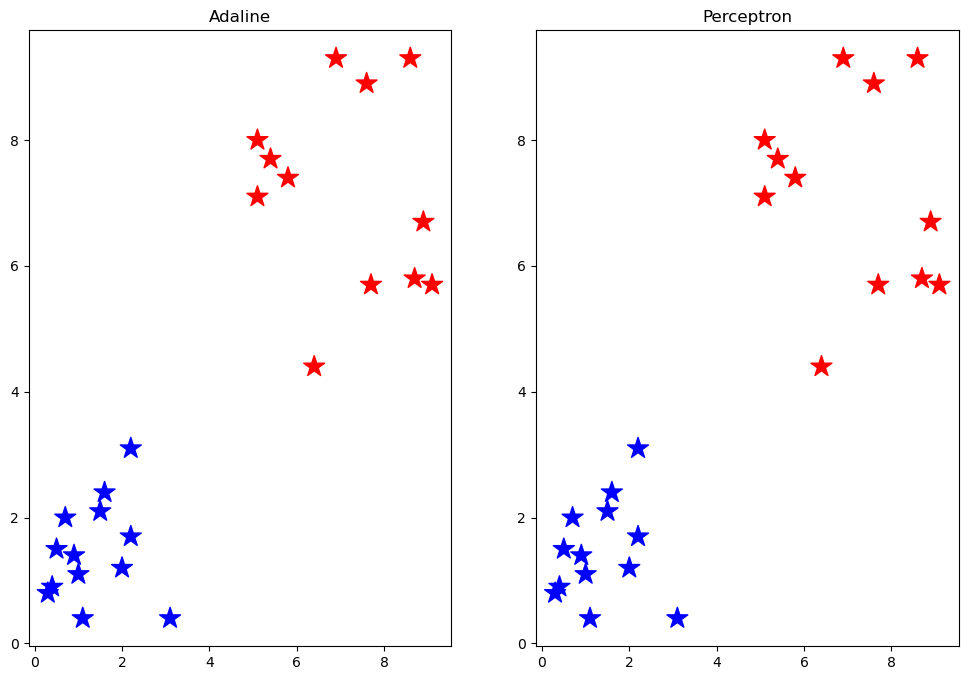

In [19]:
# Plotando resultados
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Adaline")
#plt.scatter(x[:, 0], x[:, 1], c=d, cmap='bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c=result_a, cmap='bwr', s=250, marker='*')

plt.subplot(1, 2, 2)
plt.title("Perceptron")
#plt.scatter(x[:, 0], x[:, 1], c=d, cmap='bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c=result_p, cmap='bwr', s=250, marker='*')
plt.show()

#### Questão 3 (35 pontos)

Em relação ao Perceptron Multicamadas, faça o que se pede:

**a) (12 pontos)** Dado o conjunto de dados abaixo, que serão separados em duas classes (classificação Binária), na *rede1*, coloque o número de Neurônios necessários na camada de saída para que o código rode.

**b) (12 pontos)** Após isso, treine a *rede1* e crie uma segunda rede, *rede2*, que deve possuir a mesma taxa de aprendizagem e critério de parada da primeira rede. O número de neurônios deve ser os dois maiores digitos da sua matrícula em sequência, do maior para o menor, seguido pela resposta da questão a). 

Por exemplo: 1736 será [7, 6, Resposta da questão a)]. Se os dois maiores forem 1 e 0 some com 5 cada um ficando [5, 4, ?].

**c) (11 pontos)** Qual das duas redes treinadas foi melhor no treinamento? Qual das duas teve o menor erro e foi mais rápida ao final?

**Resposta C:** 
A rede 2 foi mais rápida e com menor erro final.

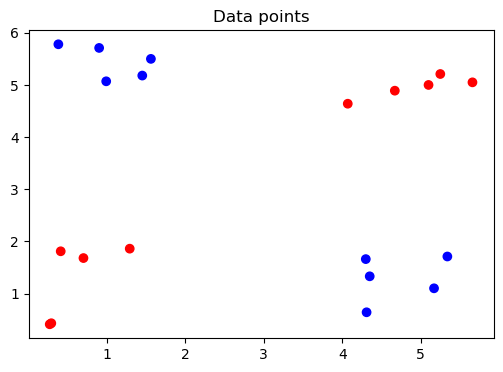

In [ ]:
#Conjunto de dados de entrada e suas respectivas respostas

x = np.array([[0.27, 0.41],[0.41, 1.81],[1.29, 1.86],[0.29, 0.43],[0.7 , 1.68],
              [5.66, 5.05],[5.25, 5.21],[4.07, 4.64],[4.67, 4.89],[5.1 , 5.  ],
              [1.45, 5.18],[0.99, 5.07],[0.38, 5.78],[0.9 , 5.71],[1.56, 5.5 ],
              [5.17, 1.1 ],[4.3 , 1.66],[5.34, 1.71],[4.31, 0.64],[4.35, 1.33]])

d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

#### Perceptron Multicamadas (Não precisa modificar esse trecho de código)

In [ ]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        """ Construtor """
        # Taxa de aprendizado 
        self.lr = lr
        
        # tolerância
        self.e = e
        
        # Quantidade de neurônios por camadas
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        '''Calcula a sigmoid de um valor'''
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        '''Calcula a derivada da função sigmoid'''
        sig = self.sigmoid(valor)
        return (1 - sig**2)

    def activate(self, valor):
        '''Ativa as saídas do neurônio'''
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        '''Calcular a derivada da função de ativação'''
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        '''Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)

    def predict(self, input_data, weights):
        '''Calcula a soma ponderada das entradas pelo peso'''
        return np.dot(input_data, weights).reshape(1, -1)
    
    
    def train(self, x, d):
        ''' 
        Definir aleatoriamente os pesos, o bias e o peso do bias
        Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
            
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results

#### Responda a questão aqui:

In [ ]:
#Questão A
rede1 = MLP(lr = 0.1, e = 1e-6, neurons = [5, 3, 1])
rede1.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.34188089]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.28434021]] - |mse_ant - mse|: [[0.05754068]]
EPOCH: 2 - MSE: [[0.25071598]] - |mse_ant - mse|: [[0.03362423]]
EPOCH: 3 - MSE: [[0.24699364]] - |mse_ant - mse|: [[0.00372234]]
EPOCH: 4 - MSE: [[0.25109859]] - |mse_ant - mse|: [[0.00410494]]
EPOCH: 5 - MSE: [[0.25398879]] - |mse_ant - mse|: [[0.0028902]]
EPOCH: 6 - MSE: [[0.25531043]] - |mse_ant - mse|: [[0.00132164]]
EPOCH: 7 - MSE: [[0.25583106]] - |mse_ant - mse|: [[0.00052063]]
EPOCH: 8 - MSE: [[0.25602117]] - |mse_ant - mse|: [[0.00019011]]
EPOCH: 9 - MSE: [[0.25609114]] - |mse_ant - mse|: [[6.99658552e-05]]
EPOCH: 10 - MSE: [[0.25612278]] - |mse_ant - mse|: [[3.16472391e-05]]
EPOCH: 11 - MSE: [[0.2561435]] - |mse_ant - mse|: [[2.07139458e-05]]
EPOCH: 12 - MSE: [[0.25616042]] - |mse_ant - mse|: [[1.69177924e-05]]
EPOCH: 13 - MSE: [[0.25617458]] - |mse_ant - mse|: [[1.41637541e-05]]
EPOCH: 14 - MSE: [[0.25618592]] - |mse_ant - mse|: [[1.13432159e-05]]
EPOCH

/var/folders/yb/1nxdlghd7gl7szry2_7pdwz40000gn/T/ipykernel_77108/205958277.py:17: RuntimeWarning: overflow encountered in power
  return (1/(1+math.e**(-valor)))


EPOCH: 258 - MSE: [[0.17135932]] - |mse_ant - mse|: [[0.04060527]]
EPOCH: 259 - MSE: [[0.14223054]] - |mse_ant - mse|: [[0.02912877]]
EPOCH: 260 - MSE: [[0.16497197]] - |mse_ant - mse|: [[0.02274143]]
EPOCH: 261 - MSE: [[0.14882412]] - |mse_ant - mse|: [[0.01614785]]
EPOCH: 262 - MSE: [[0.16336621]] - |mse_ant - mse|: [[0.01454209]]
EPOCH: 263 - MSE: [[0.12546719]] - |mse_ant - mse|: [[0.03789902]]
EPOCH: 264 - MSE: [[0.16334985]] - |mse_ant - mse|: [[0.03788266]]
EPOCH: 265 - MSE: [[0.13454129]] - |mse_ant - mse|: [[0.02880856]]
EPOCH: 266 - MSE: [[0.16441455]] - |mse_ant - mse|: [[0.02987326]]
EPOCH: 267 - MSE: [[0.13162214]] - |mse_ant - mse|: [[0.0327924]]
EPOCH: 268 - MSE: [[0.16521968]] - |mse_ant - mse|: [[0.03359754]]
EPOCH: 269 - MSE: [[0.13357611]] - |mse_ant - mse|: [[0.03164358]]
EPOCH: 270 - MSE: [[0.16987221]] - |mse_ant - mse|: [[0.03629611]]
EPOCH: 271 - MSE: [[0.12842661]] - |mse_ant - mse|: [[0.0414456]]
EPOCH: 272 - MSE: [[0.15424524]] - |mse_ant - mse|: [[0.02581863

In [ ]:
#Questão B
rede2 = MLP(lr = 0.1, e = 1e-6, neurons = [6, 6, 1])
rede2.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.40908104]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.31217289]] - |mse_ant - mse|: [[0.09690815]]
EPOCH: 2 - MSE: [[0.23127329]] - |mse_ant - mse|: [[0.0808996]]
EPOCH: 3 - MSE: [[0.24559299]] - |mse_ant - mse|: [[0.0143197]]
EPOCH: 4 - MSE: [[0.2542706]] - |mse_ant - mse|: [[0.00867761]]
EPOCH: 5 - MSE: [[0.25600066]] - |mse_ant - mse|: [[0.00173006]]
EPOCH: 6 - MSE: [[0.25626629]] - |mse_ant - mse|: [[0.00026563]]
EPOCH: 7 - MSE: [[0.25626646]] - |mse_ant - mse|: [[1.72910885e-07]]
